# Assignment 6 - Deep Learning Exercises

Ana Araújo, 59457

Pedro Almeida, 58844

For this assignment, we consider the reference model presented in the tutorial
(https://www.tensorflow.org/tutorials/images/
classification) for solving the following problems:

## Problem 1:
\
Create 4 different models, one at a time, by modifying the reference model in the following manner:\
i) Using the mean squared error as a loss function.\
ii) Using a dropout probability of 40%.\
iii) Using a batch size of 8.\
iv) Using batch normalization (see this link for more information).\
v) Combine modifications ii, iii and iv.\
\
Compare the models (including the reference model) in terms of accuracy and loss values, and verify the learning curves for train and validation sets. Also, record the number of epochs until overfit and the average time per epoch.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import time
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.datasets import make_classification
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from matplotlib import pyplot
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
# training set
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
# validation set
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
num_classes = len(class_names)

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

### Creation of Reference Model:

In [ ]:
start_time = time.time()

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# the number of epochs until overfitting
def find_overfit_epoch(history):
    val_loss = history.history['val_loss']
    min_val_loss = min(val_loss)
    overfit_epoch = val_loss.index(min_val_loss) + 1
    return overfit_epoch


history = model.fit(
  train_ds,
  steps_per_epoch=6,
  epochs=15,
  validation_data=val_ds,
  validation_steps=2,
  verbose=2
)

end_time = time.time()

Epoch 1/15
6/6 - 9s - loss: 2.1813 - accuracy: 0.2083 - val_loss: 1.6043 - val_accuracy: 0.2500 - 9s/epoch - 2s/step
Epoch 2/15
6/6 - 1s - loss: 1.6019 - accuracy: 0.2135 - val_loss: 1.5870 - val_accuracy: 0.2031 - 560ms/epoch - 93ms/step
Epoch 3/15
6/6 - 1s - loss: 1.5723 - accuracy: 0.2865 - val_loss: 1.5749 - val_accuracy: 0.2500 - 780ms/epoch - 130ms/step
Epoch 4/15
6/6 - 1s - loss: 1.5042 - accuracy: 0.3333 - val_loss: 1.4337 - val_accuracy: 0.3906 - 559ms/epoch - 93ms/step
Epoch 5/15
6/6 - 1s - loss: 1.4588 - accuracy: 0.3750 - val_loss: 1.2814 - val_accuracy: 0.5312 - 775ms/epoch - 129ms/step
Epoch 6/15
6/6 - 1s - loss: 1.3169 - accuracy: 0.4479 - val_loss: 1.2668 - val_accuracy: 0.4531 - 778ms/epoch - 130ms/step
Epoch 7/15
6/6 - 1s - loss: 1.2290 - accuracy: 0.4115 - val_loss: 1.1875 - val_accuracy: 0.5312 - 566ms/epoch - 94ms/step
Epoch 8/15
6/6 - 1s - loss: 1.1840 - accuracy: 0.5104 - val_loss: 1.3024 - val_accuracy: 0.4531 - 787ms/epoch - 131ms/step
Epoch 9/15
6/6 - 1s - los

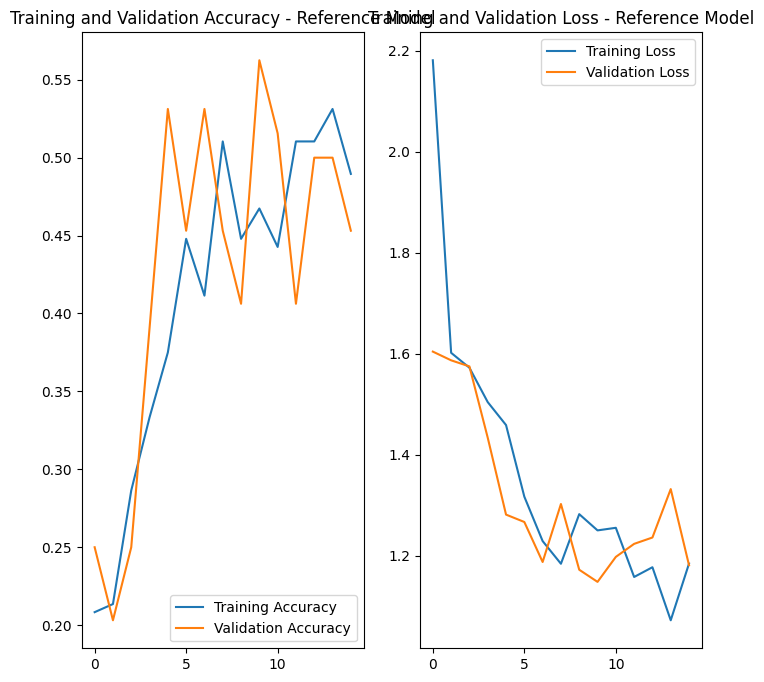

In [ ]:
acc_r = history.history['accuracy']
val_acc_r = history.history['val_accuracy']

loss_r = history.history['loss']
val_loss_r = history.history['val_loss']
epochs = 15
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_r, label='Training Accuracy')
plt.plot(epochs_range, val_acc_r, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy - Reference Model')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_r, label='Training Loss')
plt.plot(epochs_range, val_loss_r, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss - Reference Model')
plt.show()

In [ ]:
print('Reference Model')
print('Time per epoch: {:.2f} seconds'.format((end_time-start_time)/15))
print('Reference Model Overfit Epoch:', find_overfit_epoch(history))


Reference Model
Time per epoch: 1.66 seconds
Reference Model Overfit Epoch: 10


For the reference model, the validation accuracy reachs about 60% and the trainig data presents the same behaviour. Moreover the loss function for validation and training present the same decreasing tendency. This can be explained by the low number of epochs and the needing adjustment for same parameters (ex: bath size, batch normalization...)

**i) Using the mean squared error as a loss function.**

In [ ]:
start_time_2 = time.time()

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [ ]:
epochs=15
history = model.fit(
  train_ds,
  steps_per_epoch=6,
  epochs=15,
  validation_data=val_ds,
  validation_steps=2,
  verbose=2

)


end_time_2 = time.time()

Epoch 1/15
6/6 - 4s - loss: 5.8946 - accuracy: 0.4348 - val_loss: 3.0256 - val_accuracy: 0.1562 - 4s/epoch - 618ms/step
Epoch 2/15
6/6 - 1s - loss: 2.2434 - accuracy: 0.2656 - val_loss: 2.4255 - val_accuracy: 0.2500 - 825ms/epoch - 138ms/step
Epoch 3/15
6/6 - 1s - loss: 1.8656 - accuracy: 0.2344 - val_loss: 1.4753 - val_accuracy: 0.1875 - 783ms/epoch - 130ms/step
Epoch 4/15
6/6 - 1s - loss: 1.6657 - accuracy: 0.2500 - val_loss: 1.7196 - val_accuracy: 0.1719 - 562ms/epoch - 94ms/step
Epoch 5/15
6/6 - 1s - loss: 1.7229 - accuracy: 0.1667 - val_loss: 1.6014 - val_accuracy: 0.1250 - 775ms/epoch - 129ms/step
Epoch 6/15
6/6 - 1s - loss: 1.5557 - accuracy: 0.1719 - val_loss: 1.5172 - val_accuracy: 0.1875 - 773ms/epoch - 129ms/step
Epoch 7/15
6/6 - 1s - loss: 1.8390 - accuracy: 0.2344 - val_loss: 1.6218 - val_accuracy: 0.3125 - 610ms/epoch - 102ms/step
Epoch 8/15
6/6 - 1s - loss: 1.5910 - accuracy: 0.2708 - val_loss: 1.7002 - val_accuracy: 0.2031 - 771ms/epoch - 128ms/step
Epoch 9/15
6/6 - 1s 

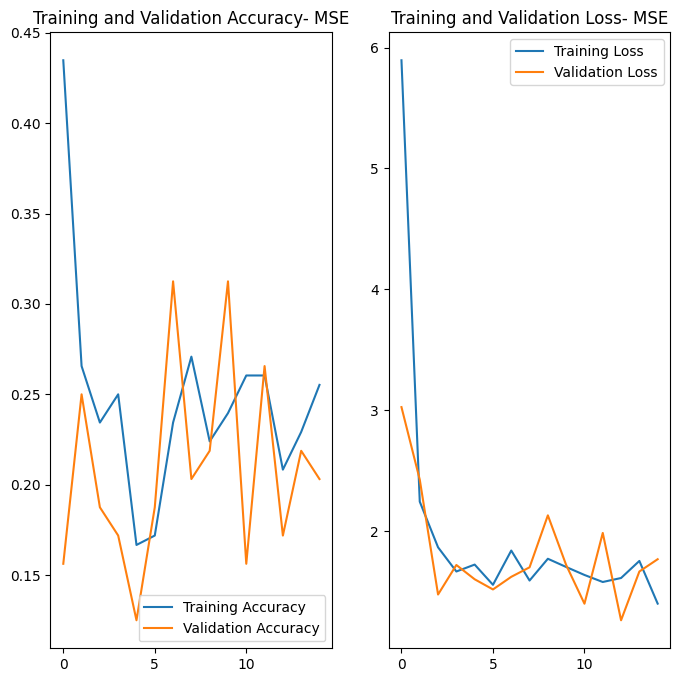

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy- MSE')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss- MSE')
plt.show()

In [ ]:
print('Mddel with MSE as loss function')
print('Time per epoch: {:.2f} seconds'.format((end_time_2-start_time_2)/15))
print('Reference Model Overfit Epoch:', find_overfit_epoch(history))

Mddel with MSE as loss function
Time per epoch: 0.90 seconds
Reference Model Overfit Epoch: 13


Based on the training and validation accuracy curves plotted, we can observe that the accuracy of the model increases gradually during the training epochs, and the validation accuracy also follows a similar trend but with fluctuations. However, the accuracy of the model is lower for both trainiing and validation accuracy and the final validation accuracy of the model is lower than the training accuracy, indicating that the model may have overfit to the training data.

The training loss curve shows a decreasing trend over the epochs, which is expected as the model is optimized to minimize the loss. However, the validation loss curve vary during the training epochs and does not show a clear decreasing trend, which indicates that the model may be overfitting to the training data.

**ii) Using a dropout probability of 40%.**

In [ ]:
start_time_3 = time.time()
model2 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [ ]:
epochs = 15
history = model2.fit(
  train_ds,
  steps_per_epoch=6,
  epochs=15,
  validation_data=val_ds,
  validation_steps=2,
  verbose=2

)


end_time_3 = time.time()

Epoch 1/15
6/6 - 3s - loss: 2.6289 - accuracy: 0.2083 - val_loss: 1.6580 - val_accuracy: 0.1406 - 3s/epoch - 542ms/step
Epoch 2/15
6/6 - 1s - loss: 1.5959 - accuracy: 0.2500 - val_loss: 1.5728 - val_accuracy: 0.2969 - 813ms/epoch - 136ms/step
Epoch 3/15
6/6 - 1s - loss: 1.5412 - accuracy: 0.3021 - val_loss: 1.5649 - val_accuracy: 0.2344 - 783ms/epoch - 130ms/step
Epoch 4/15
6/6 - 1s - loss: 1.5014 - accuracy: 0.2717 - val_loss: 1.4654 - val_accuracy: 0.3438 - 770ms/epoch - 128ms/step
Epoch 5/15
6/6 - 1s - loss: 1.4195 - accuracy: 0.3802 - val_loss: 1.3811 - val_accuracy: 0.4219 - 545ms/epoch - 91ms/step
Epoch 6/15
6/6 - 1s - loss: 1.3588 - accuracy: 0.4010 - val_loss: 1.4144 - val_accuracy: 0.3438 - 561ms/epoch - 93ms/step
Epoch 7/15
6/6 - 1s - loss: 1.3451 - accuracy: 0.4115 - val_loss: 1.1929 - val_accuracy: 0.4375 - 548ms/epoch - 91ms/step
Epoch 8/15
6/6 - 1s - loss: 1.3486 - accuracy: 0.3438 - val_loss: 1.3674 - val_accuracy: 0.4531 - 772ms/epoch - 129ms/step
Epoch 9/15
6/6 - 1s - 

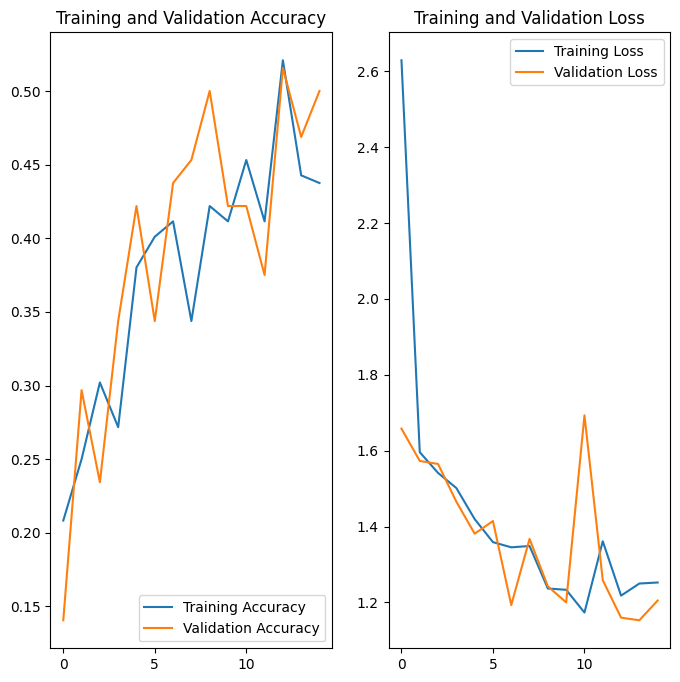

In [ ]:
acc2 = history.history['accuracy']
val_acc2 = history.history['val_accuracy']

loss2 = history.history['loss']
val_loss2 = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc2, label='Training Accuracy')
plt.plot(epochs_range, val_acc2, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss2, label='Training Loss')
plt.plot(epochs_range, val_loss2, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
print('Mddel with 40% drop out')
print('Time per epoch: {:.2f} seconds'.format((end_time_3-start_time_3)/15))
print('Reference Model Overfit Epoch:', find_overfit_epoch(history))

Mddel with 40% drop out
Time per epoch: 1.51 seconds
Reference Model Overfit Epoch: 14


Comparing the results with the previous model, we can see that the accuracy is higher, with a training accuracy of around 60% and validation accuracy of around 50%. Moreover, the training and validation loss plots show that the model is learning well, as both the training and validation loss decrease consistently with each epoch.
Nevertheless, more epochs would achieve a more precise accuracy value.

**iii)  Using a batch size of 8.**


In [ ]:
batch_size2 = 8

In [ ]:
train_ds2 = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size2)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds2 = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size2)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names2 = train_ds2.class_names
print(class_names2)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds2 = train_ds2.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds2 = val_ds2.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_augmentation2 = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:

model3 = Sequential([
  data_augmentation2,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
start_time_4 = time.time()
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 15

history = model3.fit(
  train_ds,
  steps_per_epoch=6,
  epochs=15,
  validation_data=val_ds,
  validation_steps=2,
  verbose=2

)
end_time_4 = time.time()

Epoch 1/15
6/6 - 4s - loss: 2.2027 - accuracy: 0.2135 - val_loss: 1.5822 - val_accuracy: 0.3594 - 4s/epoch - 596ms/step
Epoch 2/15
6/6 - 1s - loss: 1.5258 - accuracy: 0.3490 - val_loss: 1.5988 - val_accuracy: 0.2031 - 575ms/epoch - 96ms/step
Epoch 3/15
6/6 - 1s - loss: 1.4404 - accuracy: 0.3594 - val_loss: 1.3647 - val_accuracy: 0.4375 - 775ms/epoch - 129ms/step
Epoch 4/15
6/6 - 1s - loss: 1.3060 - accuracy: 0.4479 - val_loss: 1.3291 - val_accuracy: 0.4219 - 550ms/epoch - 92ms/step
Epoch 5/15
6/6 - 1s - loss: 1.3181 - accuracy: 0.4479 - val_loss: 1.2841 - val_accuracy: 0.4062 - 771ms/epoch - 129ms/step
Epoch 6/15
6/6 - 1s - loss: 1.3583 - accuracy: 0.4076 - val_loss: 1.3553 - val_accuracy: 0.3750 - 772ms/epoch - 129ms/step
Epoch 7/15
6/6 - 1s - loss: 1.3098 - accuracy: 0.4531 - val_loss: 1.2715 - val_accuracy: 0.4531 - 524ms/epoch - 87ms/step
Epoch 8/15
6/6 - 1s - loss: 1.2028 - accuracy: 0.4479 - val_loss: 1.1828 - val_accuracy: 0.5000 - 572ms/epoch - 95ms/step
Epoch 9/15
6/6 - 1s - l

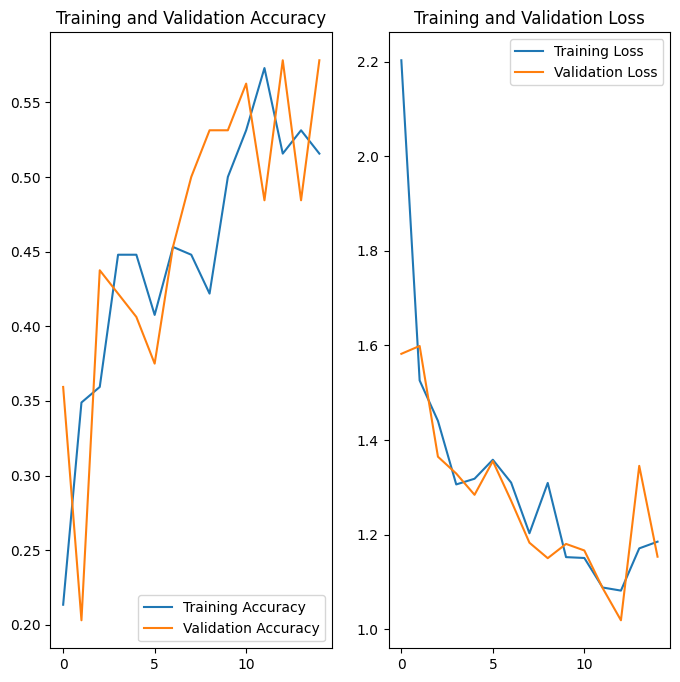

In [ ]:
acc3 = history.history['accuracy']
val_acc3 = history.history['val_accuracy']

loss3 = history.history['loss']
val_loss3 = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc3, label='Training Accuracy')
plt.plot(epochs_range, val_acc3, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss3, label='Training Loss')
plt.plot(epochs_range, val_loss3, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
print('Mddel with batch size 8')
print('Time per epoch: {:.2f} seconds'.format((end_time_4-start_time_4)/15))
print('Reference Model Overfit Epoch:', find_overfit_epoch(history))

Mddel with batch size 8
Time per epoch: 0.84 seconds
Reference Model Overfit Epoch: 13


**iv) Using batch normalization.**


In [ ]:
#usando dropout e batch size defaults (0.2 e 32)
normalization_layer = layers.Rescaling(1./255)

In [ ]:
# create the dataset
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
# compile the model

start_time_5 = time.time()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# fit the model



In [ ]:
history = model.fit(
  train_ds,
  steps_per_epoch=6,
  epochs=15,
  validation_data=val_ds,
  validation_steps=2,
  verbose=2
  )

end_time_5 = time.time()

Epoch 1/15
6/6 - 6s - loss: 0.8366 - accuracy: 0.1875 - val_loss: 8.7152 - val_accuracy: 0.1875 - 6s/epoch - 1s/step
Epoch 2/15
6/6 - 1s - loss: 0.7483 - accuracy: 0.2188 - val_loss: 8.9478 - val_accuracy: 0.1719 - 794ms/epoch - 132ms/step
Epoch 3/15
6/6 - 1s - loss: 0.5253 - accuracy: 0.2337 - val_loss: 6.1146 - val_accuracy: 0.2188 - 530ms/epoch - 88ms/step
Epoch 4/15
6/6 - 1s - loss: 0.2077 - accuracy: 0.2552 - val_loss: 1.4973 - val_accuracy: 0.1250 - 784ms/epoch - 131ms/step
Epoch 5/15
6/6 - 1s - loss: 0.1281 - accuracy: 0.2396 - val_loss: 2.7896 - val_accuracy: 0.1250 - 558ms/epoch - 93ms/step
Epoch 6/15
6/6 - 1s - loss: -6.0460e-02 - accuracy: 0.2344 - val_loss: 0.0801 - val_accuracy: 0.1719 - 781ms/epoch - 130ms/step
Epoch 7/15
6/6 - 1s - loss: -2.1154e-01 - accuracy: 0.2240 - val_loss: 0.0444 - val_accuracy: 0.1250 - 570ms/epoch - 95ms/step
Epoch 8/15
6/6 - 1s - loss: -1.2552e-01 - accuracy: 0.1719 - val_loss: -9.4979e-02 - val_accuracy: 0.1406 - 780ms/epoch - 130ms/step
Epoch

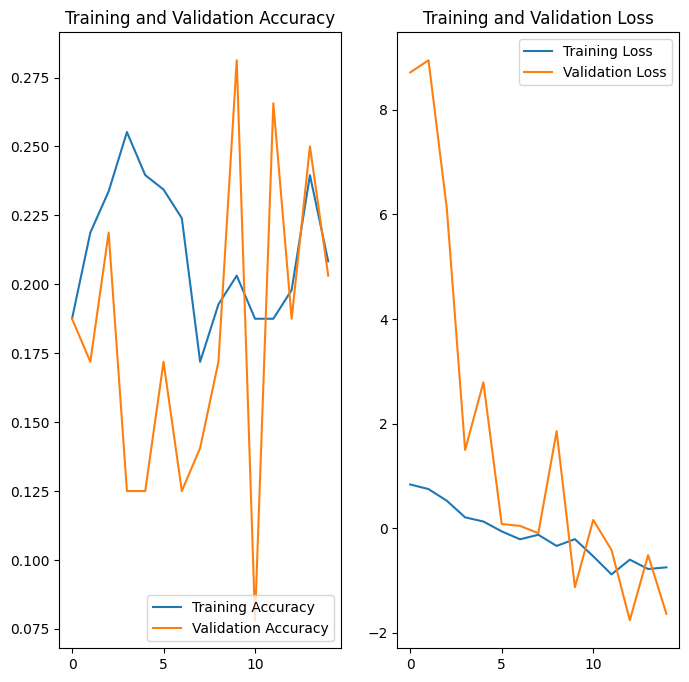

In [ ]:
acc4 = history.history['accuracy']
val_acc4 = history.history['val_accuracy']

loss4 = history.history['loss']
val_loss4 = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc4, label='Training Accuracy')
plt.plot(epochs_range, val_acc4, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss4, label='Training Loss')
plt.plot(epochs_range, val_loss4, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
print('Mddel with batch normalization')
print('Time per epoch: {:.2f} seconds'.format((end_time_5-start_time_5)/15))
print('Reference Model Overfit Epoch:', find_overfit_epoch(history))

Mddel with batch normalization
Time per epoch: 1.14 seconds
Reference Model Overfit Epoch: 13


**v) Combine modifications ii, iii and iv.**


In [ ]:
model4 = Sequential([
  data_augmentation2,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model4.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model4.add(BatchNormalization())
model4.add(Dense(1, activation='sigmoid'))

start_time_6 = time.time()
# compile the model
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# fit the model

In [ ]:
history = model4.fit(
  train_ds,
  steps_per_epoch=6,
  epochs=15,
  validation_data=val_ds,
  validation_steps=2,
  verbose=2
  )
end_time_6 = time.time()

Epoch 1/15
6/6 - 4s - loss: 0.5887 - accuracy: 0.1562 - val_loss: -9.7159e+00 - val_accuracy: 0.1875 - 4s/epoch - 708ms/step
Epoch 2/15
6/6 - 1s - loss: 0.2705 - accuracy: 0.2344 - val_loss: -7.2999e+00 - val_accuracy: 0.1406 - 612ms/epoch - 102ms/step
Epoch 3/15
6/6 - 1s - loss: 0.2206 - accuracy: 0.2188 - val_loss: -4.1042e+00 - val_accuracy: 0.1719 - 818ms/epoch - 136ms/step
Epoch 4/15
6/6 - 1s - loss: 0.0771 - accuracy: 0.2120 - val_loss: -7.3511e+00 - val_accuracy: 0.2656 - 1s/epoch - 243ms/step
Epoch 5/15
6/6 - 1s - loss: -2.3492e-03 - accuracy: 0.1615 - val_loss: -7.2654e+00 - val_accuracy: 0.2188 - 815ms/epoch - 136ms/step
Epoch 6/15
6/6 - 1s - loss: -2.6539e-01 - accuracy: 0.1667 - val_loss: -4.5365e-01 - val_accuracy: 0.1719 - 776ms/epoch - 129ms/step
Epoch 7/15
6/6 - 1s - loss: -1.6901e-01 - accuracy: 0.1979 - val_loss: -6.7601e+00 - val_accuracy: 0.2500 - 548ms/epoch - 91ms/step
Epoch 8/15
6/6 - 1s - loss: -3.0552e-01 - accuracy: 0.1771 - val_loss: -4.0586e+00 - val_accurac

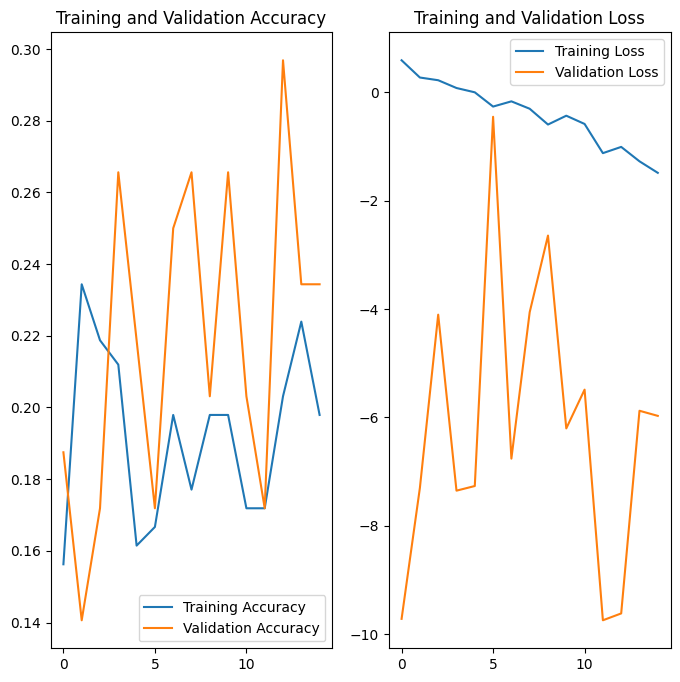

In [ ]:
acc5 = history.history['accuracy']
val_acc5 = history.history['val_accuracy']

loss5 = history.history['loss']
val_loss5 = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc5, label='Training Accuracy')
plt.plot(epochs_range, val_acc5, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss5, label='Training Loss')
plt.plot(epochs_range, val_loss5, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The training and validation loss curves indicate presented a tren decreasing. However, is achieving a low accuracy, as the validation accuracy is significantly lower. This suggests that the model may not generalize well to unseen data.

In [ ]:
print('Mddel with all combined')
print('Time per epoch: {:.2f} seconds'.format((end_time_6-start_time_6)/15))
print('Reference Model Overfit Epoch:', find_overfit_epoch(history))

Mddel with all combined
Time per epoch: 0.96 seconds
Reference Model Overfit Epoch: 12


## Problem 2:
\
Implement an autoencoder to learn to encode images from the dataset given in the image classification tutorial, based on the reference model used in the previous exercise.\
\
a) Train an autoencoder on 3500 images from the image classification dataset, leaving 170aside for validation.\
\
b) Sample 3 examples from each dataset split, the train and validation set, and use the autoencoder to encode and decode the images, comparing them with the original.\
\
c) Sample 3 examples from each dataset split, the train and validation set, encoding the images using the Encoder, obtaining the intermediate representations. Using the GaussianNoise layer, introduce 5%, 10% and 20% noise to the representations. Finally, decode the representations using the Decoder and analyze the obtained images.\
\
d) Sample 3 examples from each dataset split, the train and validation set, and introduce 5%, 10% and 20% noise (GaussianNoise Layer) to the image pixels (input level). Run the autoencoder with these inputs and analyze the obtained images.

In [ ]:
# Import necessary libraries
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape, Dense, GaussianNoise
from keras.models import Model
from tensorflow.keras.models import Sequential
import os
from PIL import Image

**a) Train an autoencoder on 3500 images from the image classification dataset, leaving 170aside for validation**

Load image data to numpy

In [ ]:
# Define the names of the subdirectories (i.e. class names)
class_names = ["daisy", "dandelion", "roses", "sunflowers", "tulips"]

# Define the desired size of the images
img_size = (96,96)

# Initialize lists to hold the images and labels
images = []
labels = []

# Loop over the subdirectories and load the images
for class_name in class_names:
    dir_path = os.path.join(data_dir, class_name)
    for img_file in os.listdir(dir_path):
        img_path = os.path.join(dir_path, img_file)
        img = Image.open(img_path)
        img = img.resize(img_size)
        img_array = np.array(img)
        images.append(img_array)
        labels.append(class_names.index(class_name))

# Convert the lists to numpy arrays
images = np.array(images)/255.
labels = np.array(labels)



# Print the shape of the dataset
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)


Images shape: (3670, 96, 96, 3)
Labels shape: (3670,)


Split the data.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(images, test_size=0.04632150, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (3500, 96, 96, 3)
X_test shape: (170, 96, 96, 3)


The **Autoencoder** is composed by 2 submodels, 1 **Encoder** and 1 **Decoder**.

In [ ]:
# Define input shape of the image
encoder_input = Input(shape=(96, 96, 3))

# Define encoder layers
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoder_input)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Bottleneck layer
x = Flatten()(x)
encoder_output = keras.layers.Dense(972, activation="relu")(x)
encoder = keras.Model(encoder_input, encoder_output, name='encoder')

# Define decoder layers
x = Dense(128*24*24, activation='relu')(encoder_output)
x = Reshape((24, 24, 128))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

decoder = keras.Model(encoder_output, decoded, name='decoder')

# Define the autoencoder model
autoencoder = Model(encoder_input, decoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()
# Train the autoencoder model
autoencoder.fit(X_train, X_train, epochs=50, shuffle=True, validation_data=(X_test, X_test))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 96, 96, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 48, 48, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 24, 24, 128)       73856 

**b) Sample 3 examples from each dataset split, the train and validation set, and use the autoencoder to encode and decode the images, comparing them with the original.**

### Visual Representation:
For the visual representation we choose to add the coded part to give an idea of how the model handled the data.

1/1 [==============================] - 0s 18ms/step


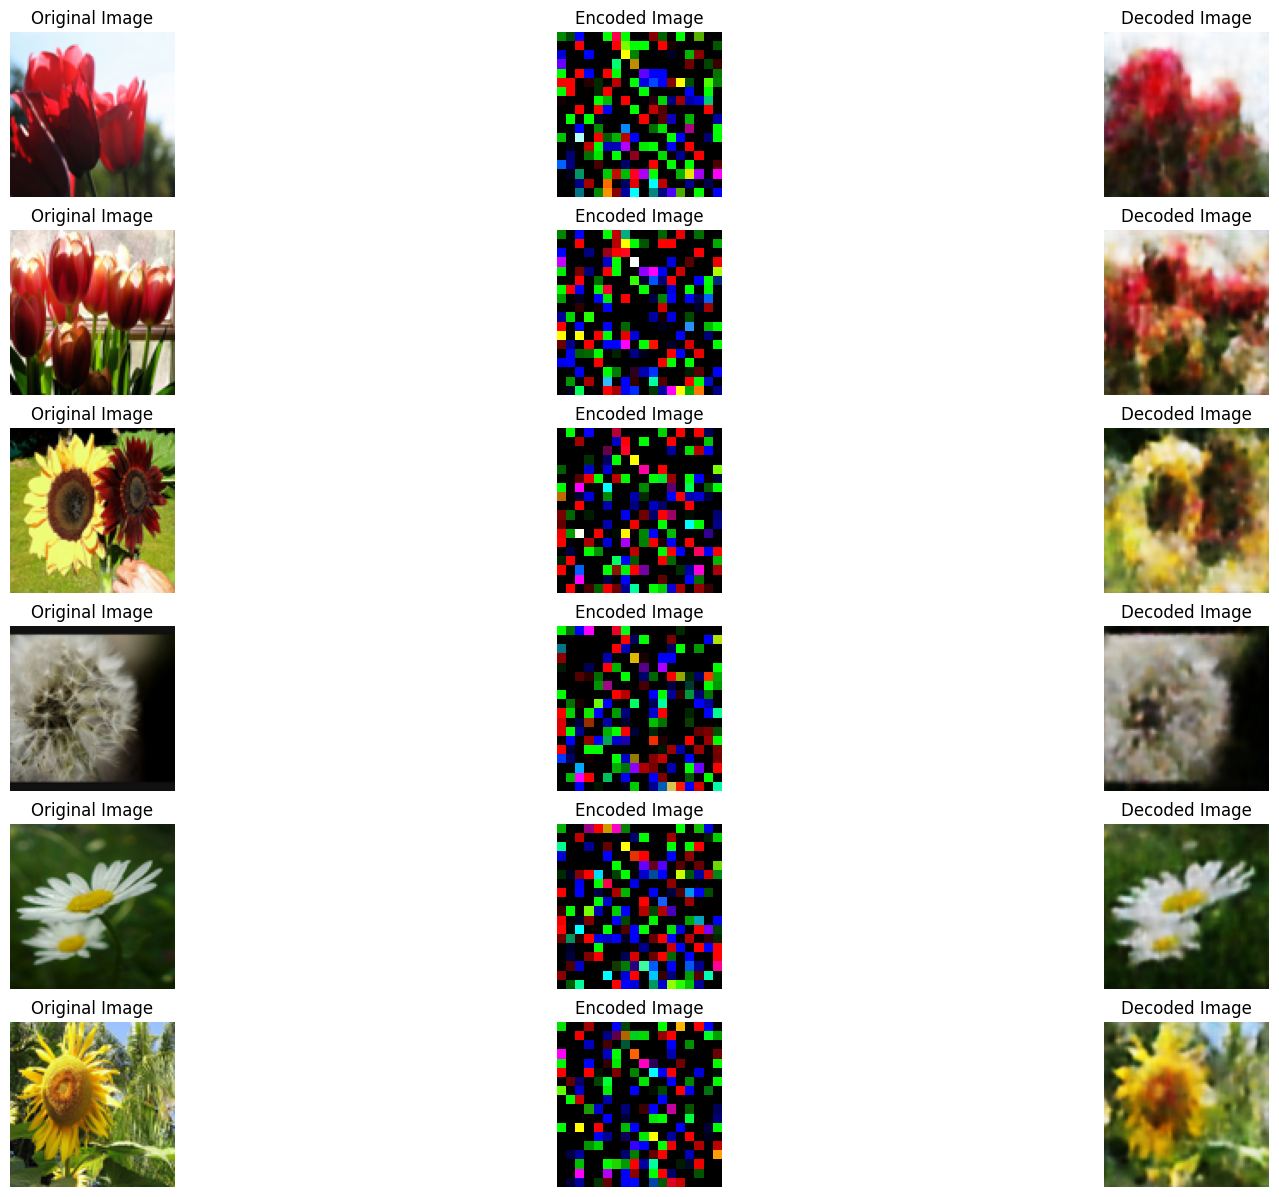

In [ ]:
# Choose a random image from the test set
idx = np.random.randint(X_test.shape[0])
img = X_test[idx]
idx2 = np.random.randint(X_test.shape[0])
img2 = X_test[idx2]
idx3 = np.random.randint(X_test.shape[0])
img3 = X_test[idx3]

idx4 = np.random.randint(X_train.shape[0])
img4 = X_train[idx4]
idx5 = np.random.randint(X_train.shape[0])
img5 = X_train[idx5]
idx6 = np.random.randint(X_train.shape[0])
img6 = X_train[idx6]

# Encode the image
encoded = encoder.predict([img.reshape(-1, 96, 96, 3)])
decoded = autoencoder.predict(img.reshape(-1, 96, 96, 3))
encoded2 = encoder.predict([img2.reshape(-1, 96, 96, 3)])
decoded2 = autoencoder.predict(img2.reshape(-1, 96, 96, 3))
encoded3 = encoder.predict([img3.reshape(-1, 96, 96, 3)])
decoded3 = autoencoder.predict(img3.reshape(-1, 96, 96, 3))

encoded4 = encoder.predict([img4.reshape(-1, 96, 96, 3)])
decoded4 = autoencoder.predict(img4.reshape(-1, 96, 96, 3))
encoded5 = encoder.predict([img5.reshape(-1, 96, 96, 3)])
decoded5 = autoencoder.predict(img5.reshape(-1, 96, 96, 3))
encoded6 = encoder.predict([img6.reshape(-1, 96, 96, 3)])
decoded6 = autoencoder.predict(img6.reshape(-1, 96, 96, 3))

# Plot the original, encoded, and decoded images
plt.figure(figsize=(20, 15))
plt.subplot(6, 3, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')
plt.subplot(6, 3, 2)
plt.title('Encoded Image')
plt.imshow(encoded.reshape(18,18,3))
plt.axis('off')
plt.subplot(6, 3, 3)
plt.title('Decoded Image')
plt.imshow(decoded[0])
plt.axis('off')

plt.subplot(6, 3, 4)
plt.title('Original Image')
plt.imshow(img2)
plt.axis('off')
plt.subplot(6, 3, 5)
plt.title('Encoded Image')
plt.imshow(encoded2.reshape(18,18,3))
plt.axis('off')
plt.subplot(6, 3, 6)
plt.title('Decoded Image')
plt.imshow(decoded2[0])
plt.axis('off')

plt.subplot(6, 3, 7)
plt.title('Original Image')
plt.imshow(img3)
plt.axis('off')
plt.subplot(6, 3, 8)
plt.title('Encoded Image')
plt.imshow(encoded3.reshape(18,18,3))
plt.axis('off')
plt.subplot(6, 3, 9)
plt.title('Decoded Image')
plt.imshow(decoded3[0])
plt.axis('off')

plt.subplot(6, 3, 10)
plt.title('Original Image')
plt.imshow(img4)
plt.axis('off')
plt.subplot(6, 3, 11)
plt.title('Encoded Image')
plt.imshow(encoded4.reshape(18,18,3))
plt.axis('off')
plt.subplot(6, 3, 12)
plt.title('Decoded Image')
plt.imshow(decoded4[0])
plt.axis('off')

plt.subplot(6, 3, 13)
plt.title('Original Image')
plt.imshow(img5)
plt.axis('off')
plt.subplot(6, 3, 14)
plt.title('Encoded Image')
plt.imshow(encoded5.reshape(18,18,3))
plt.axis('off')
plt.subplot(6, 3, 15)
plt.title('Decoded Image')
plt.imshow(decoded5[0])
plt.axis('off')

plt.subplot(6, 3, 16)
plt.title('Original Image')
plt.imshow(img6)
plt.axis('off')
plt.subplot(6, 3, 17)
plt.title('Encoded Image')
plt.imshow(encoded6.reshape(18,18,3))
plt.axis('off')
plt.subplot(6, 3, 18)
plt.title('Decoded Image')
plt.imshow(decoded6[0])
plt.axis('off')

plt.show()

### Conclusions:
The images on the training set seem to be clearer. This might indicate that the model may be overfitting. Thus, learning the training data and generalize poorly.

**c) Sample 3 examples from each dataset split, the train and validation set, encoding the images using the Encoder, obtaining the intermediate representations. Using the GaussianNoise layer, introduce 5%, 10% and 20% noise to the representations. Finally, decode the representations using the Decoder and analyze the obtained images.**

For what we understood is to add noise to the encoded part.

1/1 [==============================] - 0s 24ms/step


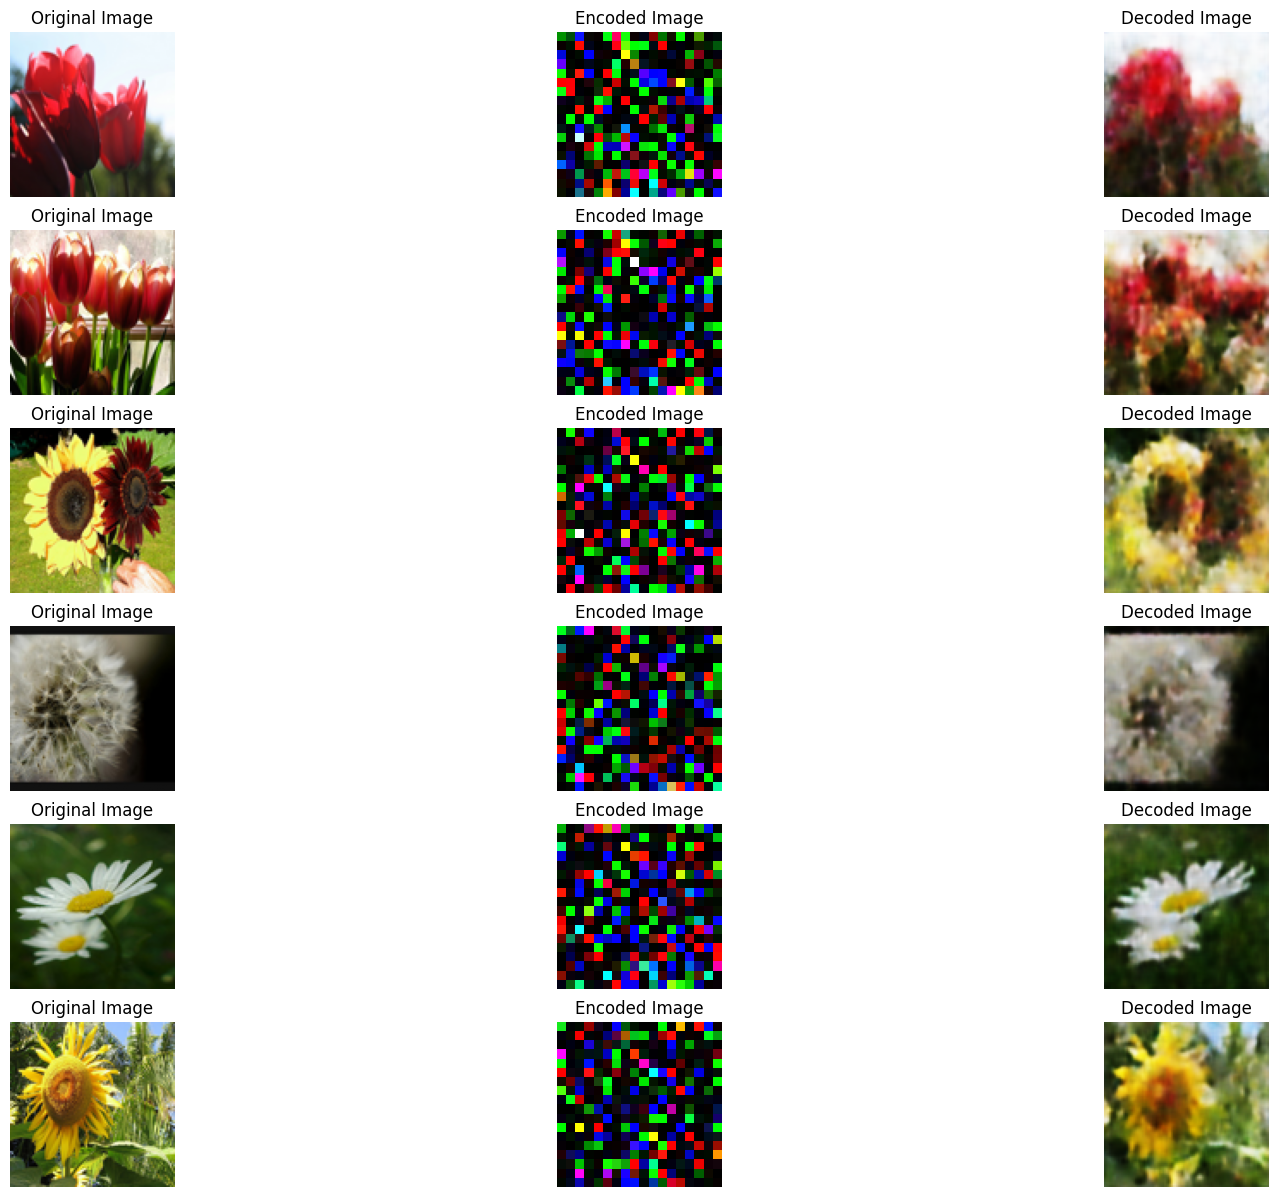

In [ ]:
def add_noise(percentage):
  encoded_noise = encoded + np.random.normal(loc=0.0, scale=percentage, size=encoded.shape)
  decoded = decoder.predict(encoded_noise)

  encoded_noise2 = encoded2 + np.random.normal(loc=0.0, scale=percentage, size=encoded2.shape)
  decoded2 = decoder.predict(encoded_noise2)

  encoded_noise3 = encoded3 + np.random.normal(loc=0.0, scale=percentage, size=encoded3.shape)
  decoded3 = decoder.predict(encoded_noise3)

  encoded_noise4 = encoded4 + np.random.normal(loc=0.0, scale=percentage, size=encoded4.shape)
  decoded4 = decoder.predict(encoded_noise4)

  encoded_noise5 = encoded5 + np.random.normal(loc=0.0, scale=percentage, size=encoded5.shape)
  decoded5 = decoder.predict(encoded_noise5)

  encoded_noise6 = encoded6 + np.random.normal(loc=0.0, scale=percentage, size=encoded6.shape)
  decoded6 = decoder.predict(encoded_noise6)

  return encoded_noise, decoded, encoded_noise2 , decoded2, encoded_noise3 , decoded3,encoded_noise4, decoded4,encoded_noise5, decoded5,encoded_noise6, decoded6

def img_plotter():
  # Plot the original, encoded, and decoded images
  plt.figure(figsize=(20, 15))
  plt.subplot(6, 3, 1)
  plt.title('Original Image')
  plt.imshow(img)
  plt.axis('off')
  plt.subplot(6, 3, 2)
  plt.title('Encoded Image')
  plt.imshow(encoded_noise.reshape(18,18,3))
  plt.axis('off')
  plt.subplot(6, 3, 3)
  plt.title('Decoded Image')
  plt.imshow(decoded[0])
  plt.axis('off')

  plt.subplot(6, 3, 4)
  plt.title('Original Image')
  plt.imshow(img2)
  plt.axis('off')
  plt.subplot(6, 3, 5)
  plt.title('Encoded Image')
  plt.imshow(encoded_noise2.reshape(18,18,3))
  plt.axis('off')
  plt.subplot(6, 3, 6)
  plt.title('Decoded Image')
  plt.imshow(decoded2[0])
  plt.axis('off')

  plt.subplot(6, 3, 7)
  plt.title('Original Image')
  plt.imshow(img3)
  plt.axis('off')
  plt.subplot(6, 3, 8)
  plt.title('Encoded Image')
  plt.imshow(encoded_noise3.reshape(18,18,3))
  plt.axis('off')
  plt.subplot(6, 3, 9)
  plt.title('Decoded Image')
  plt.imshow(decoded3[0])
  plt.axis('off')

  plt.subplot(6, 3, 10)
  plt.title('Original Image')
  plt.imshow(img4)
  plt.axis('off')
  plt.subplot(6, 3, 11)
  plt.title('Encoded Image')
  plt.imshow(encoded_noise4.reshape(18,18,3))
  plt.axis('off')
  plt.subplot(6, 3, 12)
  plt.title('Decoded Image')
  plt.imshow(decoded4[0])
  plt.axis('off')

  plt.subplot(6, 3, 13)
  plt.title('Original Image')
  plt.imshow(img5)
  plt.axis('off')
  plt.subplot(6, 3, 14)
  plt.title('Encoded Image')
  plt.imshow(encoded_noise5.reshape(18,18,3))
  plt.axis('off')
  plt.subplot(6, 3, 15)
  plt.title('Decoded Image')
  plt.imshow(decoded5[0])
  plt.axis('off')

  plt.subplot(6, 3, 16)
  plt.title('Original Image')
  plt.imshow(img6)
  plt.axis('off')
  plt.subplot(6, 3, 17)
  plt.title('Encoded Image')
  plt.imshow(encoded_noise6.reshape(18,18,3))
  plt.axis('off')
  plt.subplot(6, 3, 18)
  plt.title('Decoded Image')
  plt.imshow(decoded6[0])
  plt.axis('off')

  plt.show()

encoded_noise, decoded, encoded_noise2 , decoded2, encoded_noise3 , decoded3,encoded_noise4, decoded4,encoded_noise5, decoded5,encoded_noise6, decoded6 = add_noise(0.05)
img_plotter()

1/1 [==============================] - 0s 16ms/step


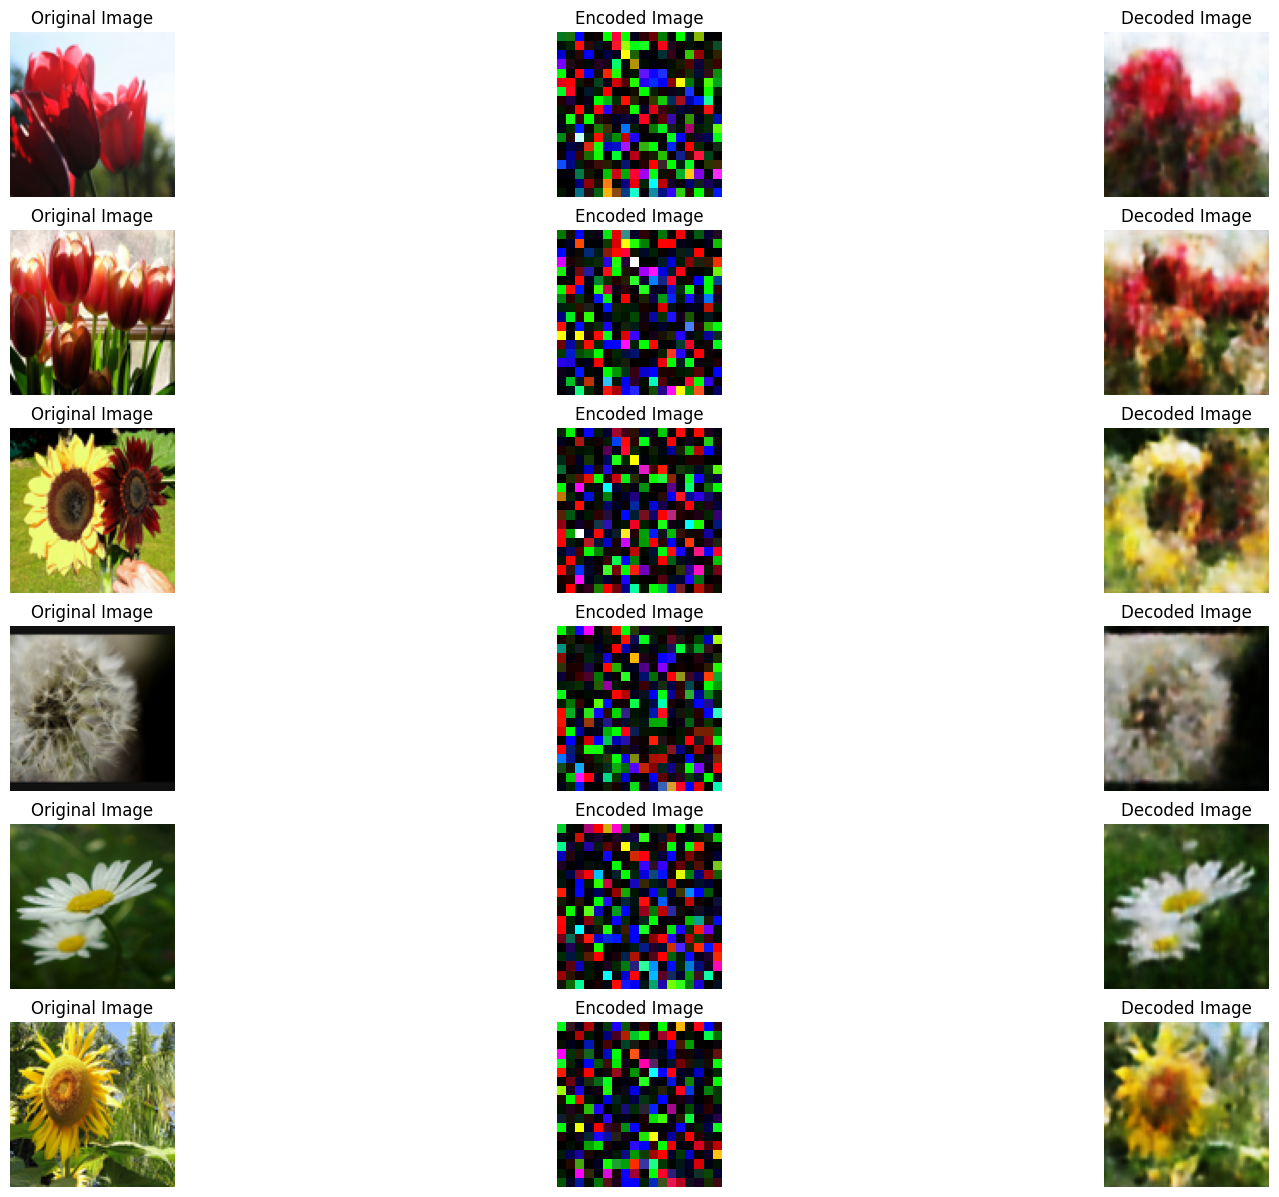

In [ ]:
encoded_noise, decoded, encoded_noise2 , decoded2, encoded_noise3 , decoded3,encoded_noise4, decoded4,encoded_noise5, decoded5,encoded_noise6, decoded6 = add_noise(0.1)
img_plotter()

1/1 [==============================] - 0s 19ms/step


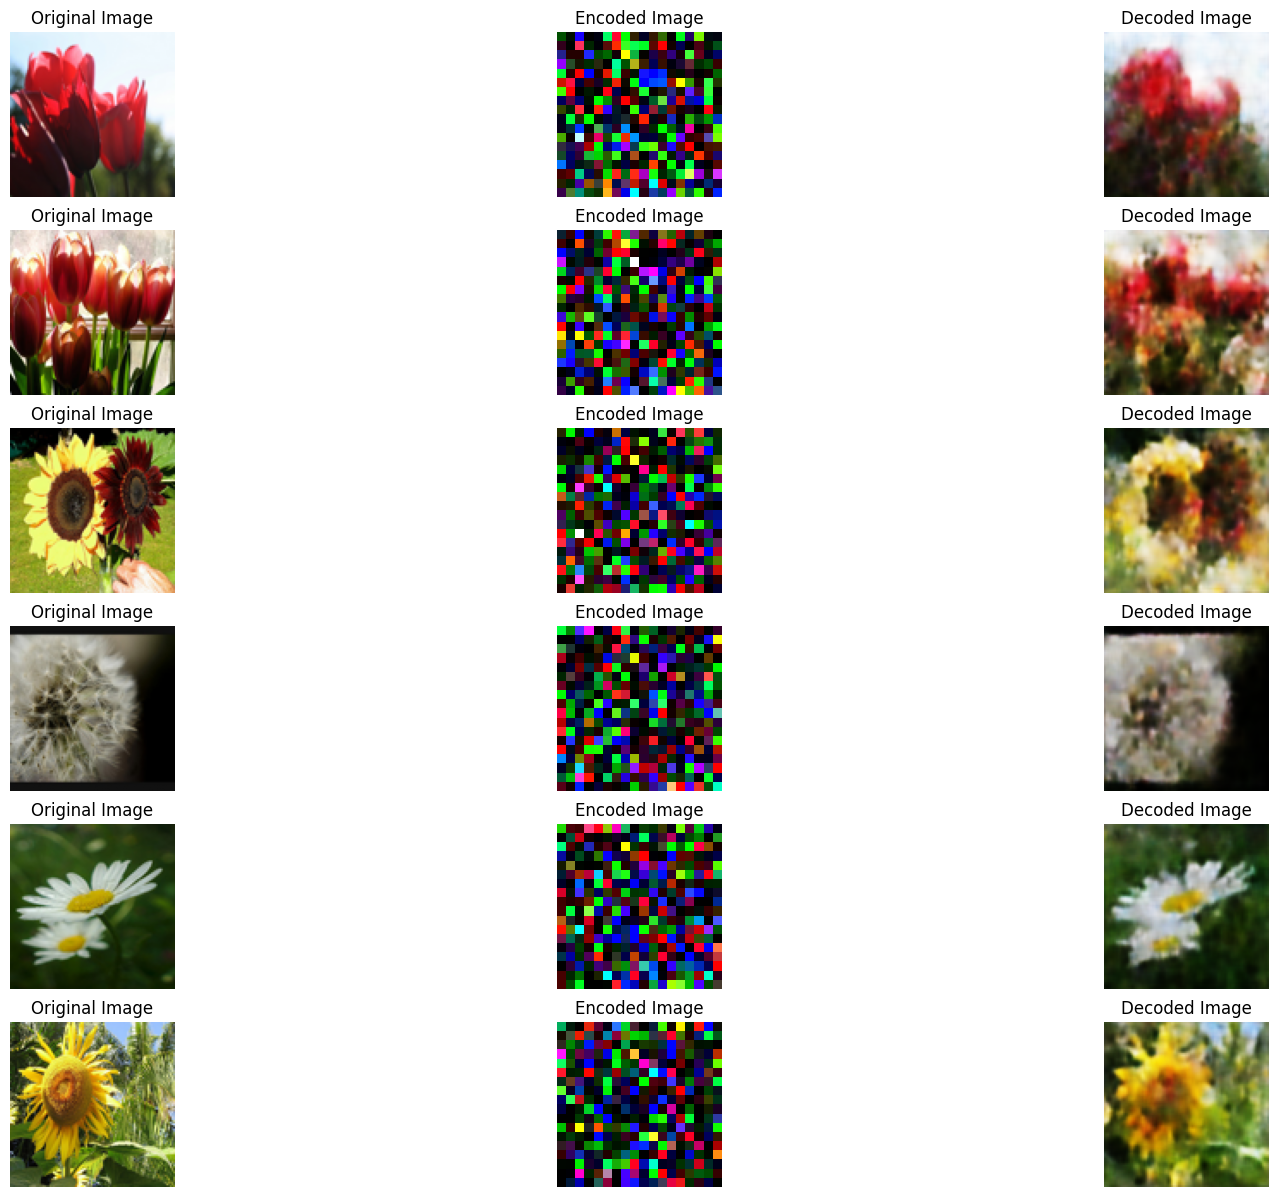

In [ ]:
encoded_noise, decoded, encoded_noise2 , decoded2, encoded_noise3 , decoded3,encoded_noise4, decoded4,encoded_noise5, decoded5,encoded_noise6, decoded6 = add_noise(0.2)
img_plotter()

### Conclusions:
Adding noise to the encoded layer totally scrambles the output and it loses resamblance with the original image. The more noise you add further away it gets from the original image.

**d) Sample 3 examples from each dataset split, the train and validation set, and introduce 5%, 10% and 20% noise (GaussianNoise Layer) to the image pixels (input level). Run the autoencoder with these inputs and analyze the obtained images.**

1/1 [==============================] - 0s 21ms/step


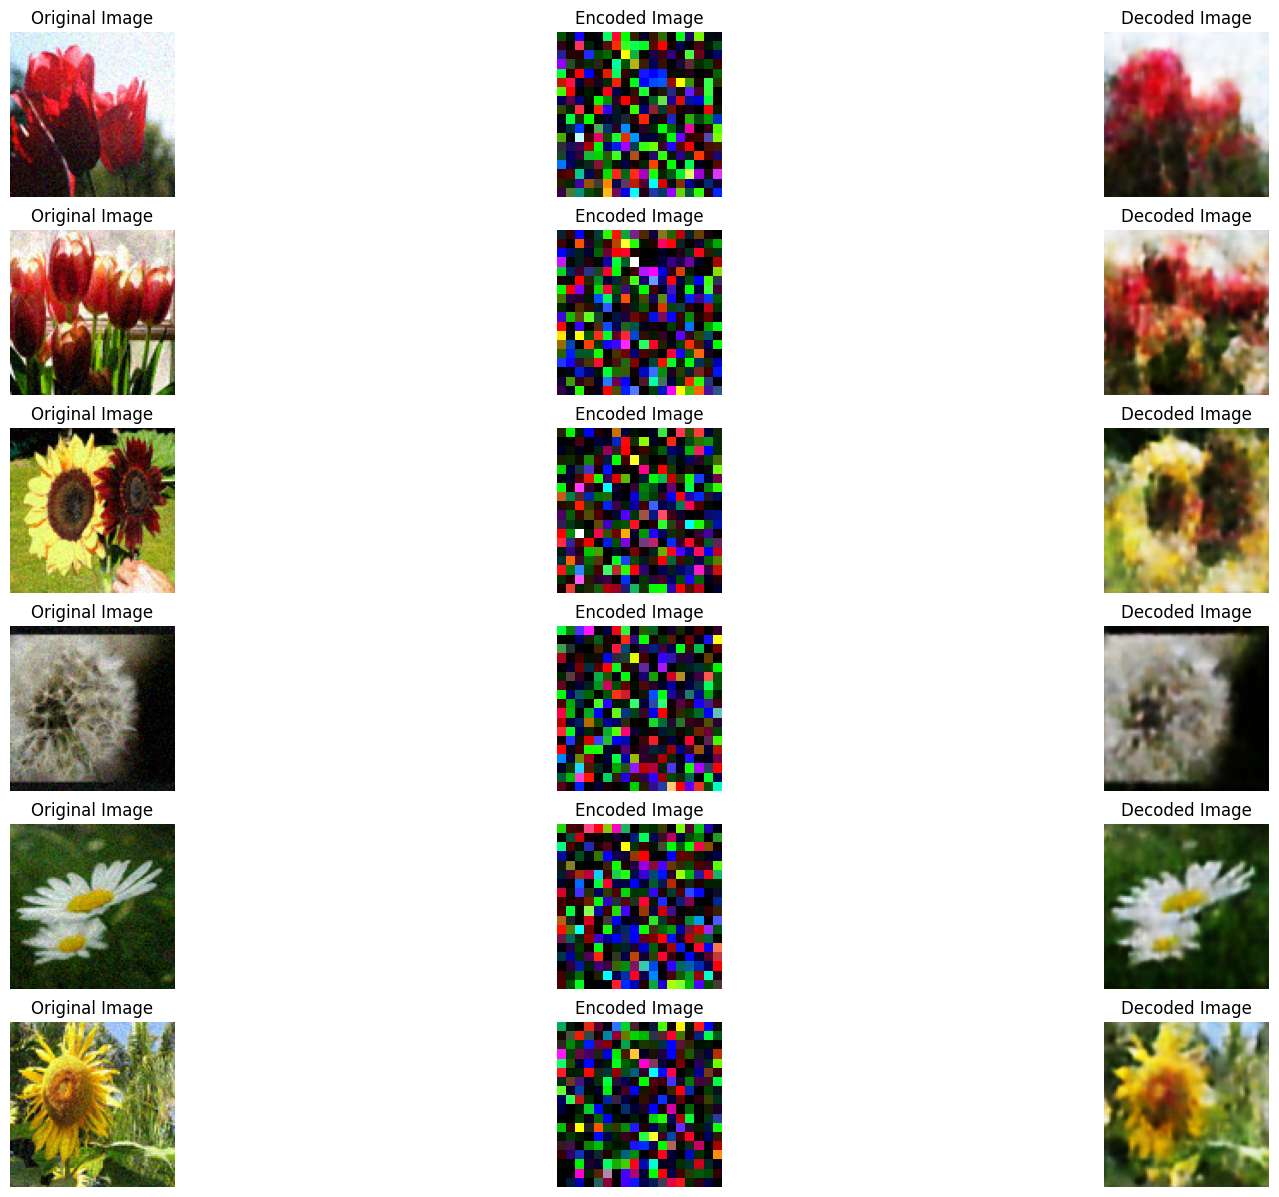

In [ ]:
def add_noise(percentage):
  img_noise = img + np.random.normal(loc=0.0, scale=percentage, size=img.shape)
  img_noise2 = img2 + np.random.normal(loc=0.0, scale=percentage, size=img2.shape)
  img_noise3 = img3 + np.random.normal(loc=0.0, scale=percentage, size=img3.shape)
  img_noise4 = img4 + np.random.normal(loc=0.0, scale=percentage, size=img4.shape)
  img_noise5 = img5 + np.random.normal(loc=0.0, scale=percentage, size=img5.shape)
  img_noise6 = img6 + np.random.normal(loc=0.0, scale=percentage, size=img6.shape)

  encoded = encoder.predict([img_noise.reshape(-1, 96, 96, 3)])
  encoded2 = encoder.predict([img_noise2.reshape(-1, 96, 96, 3)])
  encoded3 = encoder.predict([img_noise3.reshape(-1, 96, 96, 3)])
  encoded4 = encoder.predict([img_noise4.reshape(-1, 96, 96, 3)])
  encoded5 = encoder.predict([img_noise5.reshape(-1, 96, 96, 3)])
  encoded6 = encoder.predict([img_noise6.reshape(-1, 96, 96, 3)])

  decoded = decoder.predict(encoded)
  decoded2 = decoder.predict(encoded2)
  decoded3 = decoder.predict(encoded3)
  decoded4 = decoder.predict(encoded4)
  decoded5 = decoder.predict(encoded5)
  decoded6 = decoder.predict(encoded6)


  return img_noise, decoded, img_noise2 , decoded2, img_noise3 , decoded3,img_noise4, decoded4,img_noise5, decoded5,img_noise6, decoded6
img, decoded, img2 , decoded2, img3 , decoded3,img4, decoded4,img5, decoded5,img6, decoded6 = add_noise(0.05)
img_plotter()

1/1 [==============================] - 0s 25ms/step


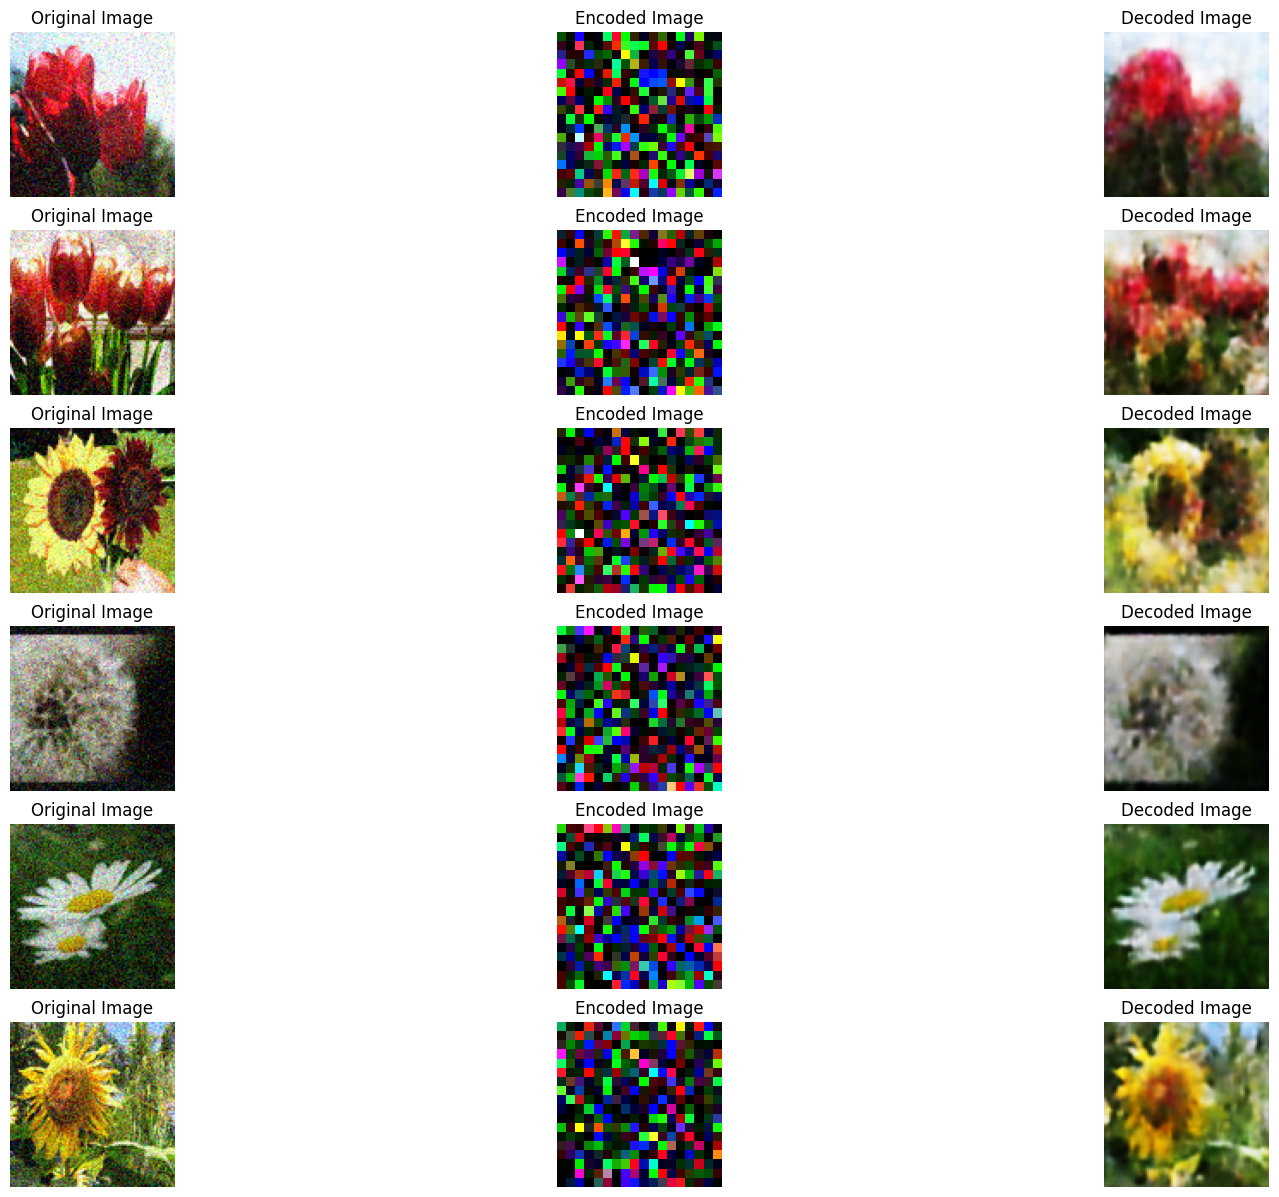

In [ ]:
img, decoded, img2 , decoded2, img3 , decoded3,img4, decoded4,img5, decoded5,img6, decoded6 = add_noise(0.1)
img_plotter()

1/1 [==============================] - 0s 18ms/step


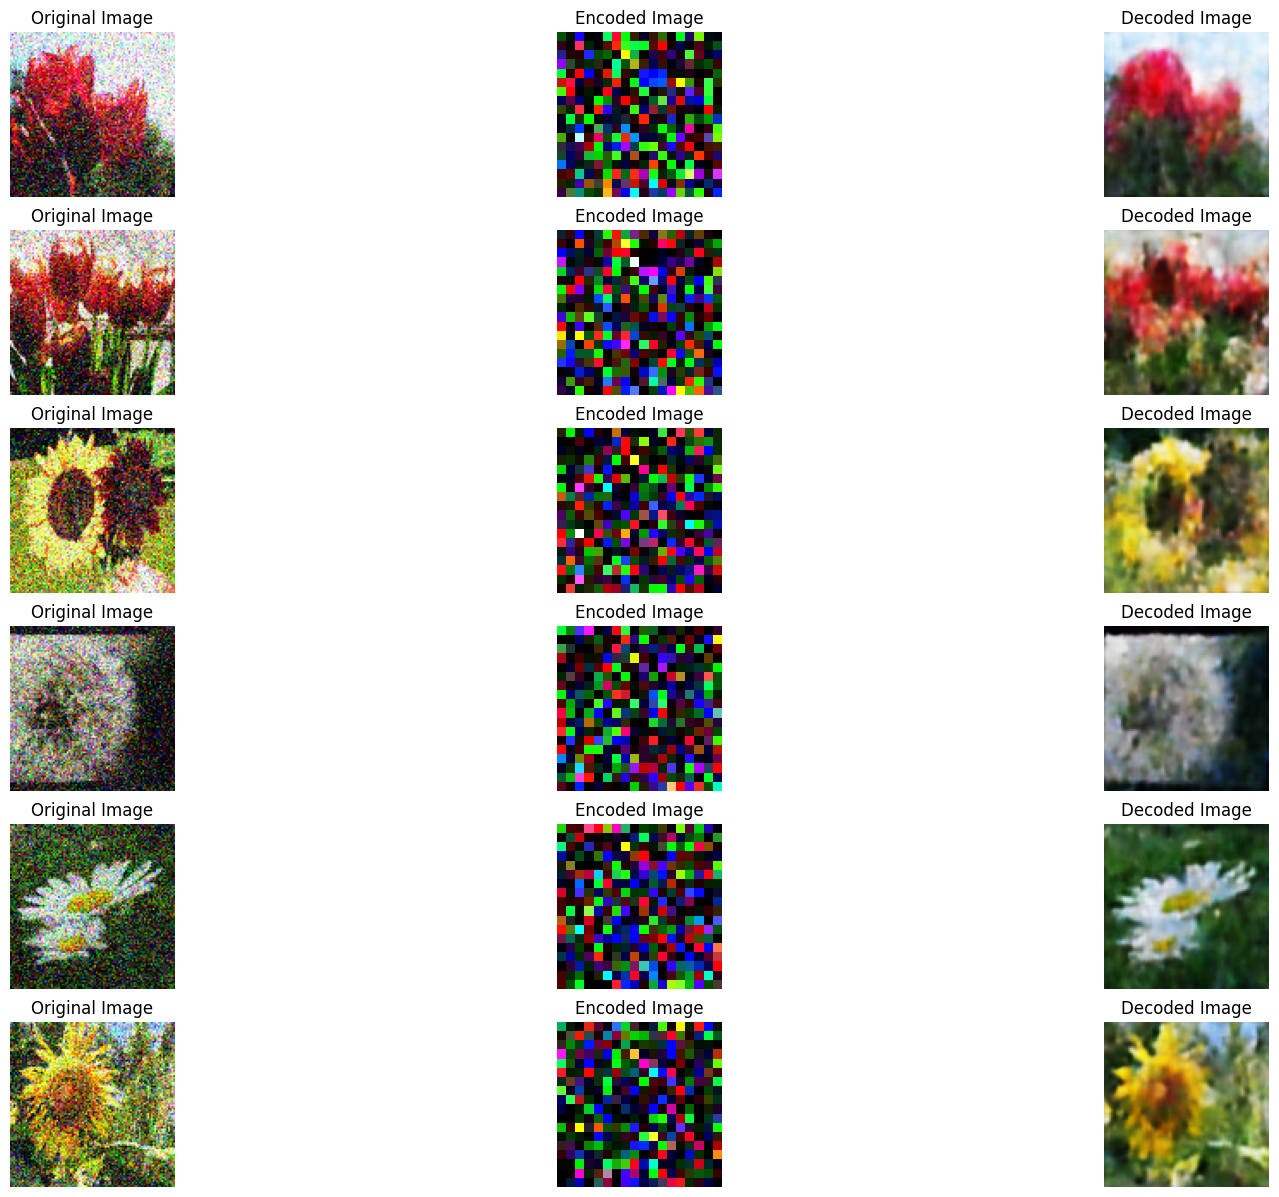

In [ ]:
img, decoded, img2 , decoded2, img3 , decoded3,img4, decoded4,img5, decoded5,img6, decoded6 = add_noise(0.2)
img_plotter()

### Conclusion:
All images with noise in the input level were some sort of 'cleaned'. Even for the 10 and 20%.